In [40]:
import nltk
from nltk import FreqDist
from urllib import request
import re
import matplotlib.pyplot as plt
import numpy as np
from nltk.collocations import *
from nltk.util import ngrams
from collections import Counter

In [41]:
#importing the first text file- 'DREAM PSYCHOLOGY: PSYCHOANALYSIS FOR BEGINNERS BY PROF. DR. SIGMUND FREUD'
# obtained from gutenberg- http://www.gutenberg.org/ebooks/15489

firstBook = open('DreamPsychology/Dream Psychology.txt')
firstrawtext = firstBook.read()
#firstrawtext[:200]

# tokenizing the words in the file
DPtokens=nltk.word_tokenize(firstrawtext)
print(len(DPtokens))
#DPtokens[:200]

60324


In [42]:
#importing the first text file- 
#'Ten Thousand Dreams Interpreted, OR, WHAT'S IN A DREAM. A SCIENTIFIC AND PRACTICAL EXPOSITION BY GUSTAVUS HINDMAN MILLER'
# obtained from gutenberg- http://www.gutenberg.org/ebooks/926

secondBook = open('TenThousanDreamsInterpreted/Ten thousand Dreams interpreted.txt')
secondrawtext = secondBook.read()
#secondrawtext[:200]

# tokenizing the words in the file
TTDtokens=nltk.word_tokenize(secondrawtext)
print(len(TTDtokens))
#TTDtokens[:200]

180688


In [43]:
#importing stopwords from the nltk package
stopwords = nltk.corpus.stopwords.words('english')
print('number stopwords:', len(stopwords))
print(stopwords)

number stopwords: 153
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just'

In [44]:
# converting the tokens to lowercase 
DPwords2lowercase = [w.lower() for w in DPtokens]
TTDwords2lowercase = [w.lower() for w in TTDtokens]

In [45]:
# removing the stopwords from the tokens
DPstoppedwords = [w for w in DPwords2lowercase if not w in stopwords]
print(len(DPstoppedwords))
#print(DPstoppedwords[:200])
TTDstoppedwords = [w for w in TTDwords2lowercase if not w in stopwords]
print(len(TTDstoppedwords))
#print(TTDstoppedwords[:200])

32076
110224


In [46]:
#removing non-alphabetical words from the list of stopped words
def alpha_filter(w):
  # function checks if the word is non-alphabetical word
  pattern = re.compile('^[^a-z]+$')
  if (pattern.match(w)):
    return True
  else:
    return False

In [47]:
DPalphawords = [w for w in DPstoppedwords if not alpha_filter(w)]
print(len(DPalphawords))
#print(DPalphawords[:200])
TTDalphawords = [w for w in TTDstoppedwords if not alpha_filter(w)]
print(len(TTDalphawords))
#print(TTDalphawords[:200])

25617
74761


In [48]:
# removing additional words by using stopwords.txt
moreStopwords=open("stopwords.txt")
words=moreStopwords.read()
#print(words)

In [49]:
TTDmorestoppedwords = [w for w in TTDalphawords if not w in words]
DPmorestoppedwords = [w for w in DPalphawords if not w in words]
print(len(DPmorestoppedwords))
print(len(TTDmorestoppedwords))


22982
67009


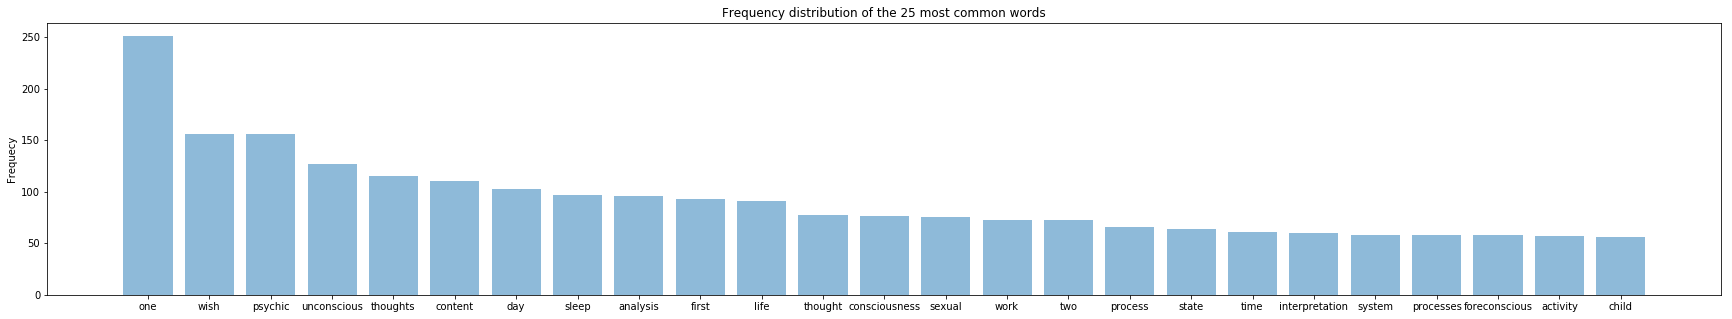

In [50]:
# calculating frequency distribution
DPdist = FreqDist(DPmorestoppedwords)
DPitems = DPdist.most_common(50)
with open("DreamPsychology/DPMostCommonWords.txt", "w") as text_file:
    for item in DPitems:
        text_file.write(str(item)+"\n")
items=[]
frequency=[]
for i in range(0,25):
    items.append(DPitems[i][0])
    frequency.append(DPitems[i][1])
    
#plotting the frequency distribution
plt.figure(figsize=(30,5))
y_pos = np.arange(len(items))
plt.bar(y_pos, frequency, align='center', alpha=0.5)
plt.xticks(y_pos, items)
plt.ylabel('Frequecy')
plt.title('Frequency distribution of the 25 most common words')
 
plt.show()

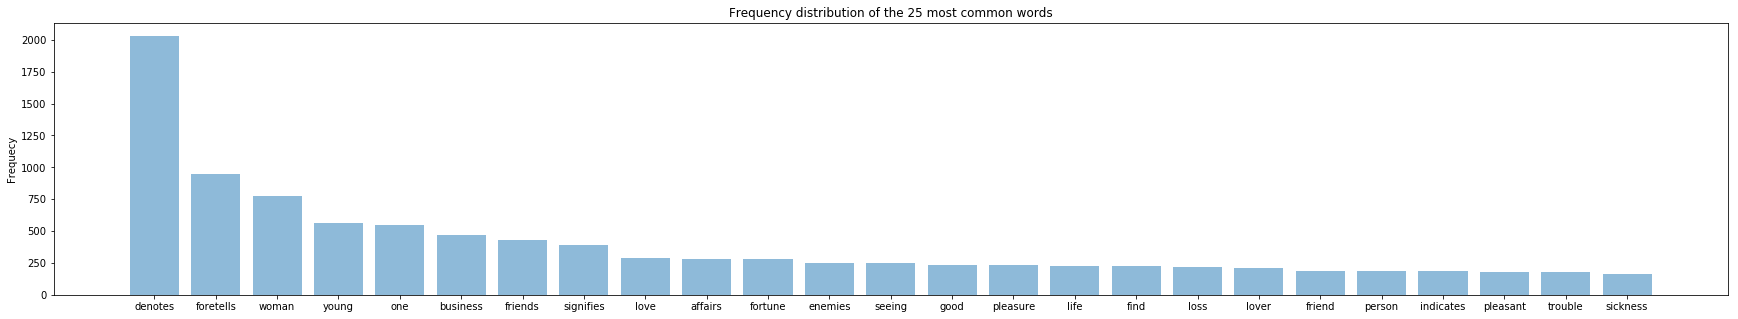

In [51]:
TTDdist = FreqDist(TTDmorestoppedwords)
TTDitems = TTDdist.most_common(50)
with open("TenThousanDreamsInterpreted/TTDMostCommonWords.txt", "w") as text_file:
    for item in TTDitems:
        text_file.write(str(item)+"\n")
items=[]
frequency=[]
for i in range(0,25):
    items.append(TTDitems[i][0])
    frequency.append(TTDitems[i][1])
    
#plotting the frequency distribution
plt.figure(figsize=(30,5))
y_pos = np.arange(len(items))
plt.bar(y_pos, frequency, align='center', alpha=0.5)
plt.xticks(y_pos, items)
plt.ylabel('Frequecy')
plt.title('Frequency distribution of the 25 most common words')
 
plt.show()

In [54]:
# bigram measures
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [55]:
# finding bigrams of first document
DPfinder = BigramCollocationFinder.from_words(DPmorestoppedwords)
DPfinder.apply_word_filter(alpha_filter)
#DPfinder.apply_word_filter(lambda w: w in stopwords)
DPfinder.apply_freq_filter(5)

#measuring bigrams using raw frequency
DPrawscored = DPfinder.score_ngrams(bigram_measures.raw_freq)

#measuring by mutual information
DPmutualscored = DPfinder.score_ngrams(bigram_measures.pmi)

In [58]:
# displaying the bigrams of first document measured by raw frequency
for bscore in DPrawscored[:50]:
    print (bscore)

#finding the mean value of the scores in 
sum=0
for bscore in DPrawscored:
    sum=sum+bscore[1]

print("Mean value of the bigrams raw frequency score is "+str(sum/len(DPrawscored))  ) 

#storing the bigrams in a file
with open("DreamPsychology/DPBigramsRawFrequency.txt", "w") as text_file:
    for score in DPrawscored[:50]:
        text_file.write(str(score)+"\n")
        

(('psychic', 'apparatus'), 0.0010007832216517275)
(('psychic', 'life'), 0.0009572709076668697)
(('unconscious', 'wish'), 0.0009572709076668697)
(('second', 'system'), 0.0007397093377425812)
(('sleeping', 'state'), 0.0006526847097728658)
(('waking', 'state'), 0.0006526847097728658)
(('principle', 'pain'), 0.0005656600818031502)
(('little', 'one'), 0.00047863545383343485)
(('outer', 'world'), 0.00047863545383343485)
(('psychic', 'processes'), 0.00047863545383343485)
(('two', 'systems'), 0.00043512313984857715)
(('manifest', 'content'), 0.00039161082586371945)
(('psychic', 'process'), 0.00039161082586371945)
(('stream', 'thought'), 0.00039161082586371945)
(('day', 'remnants'), 0.0003480985118788617)
(('fulfillment', 'wish'), 0.0003480985118788617)
(('hysterical', 'symptoms'), 0.0003480985118788617)
(('latent', 'content'), 0.0003480985118788617)
(('mental', 'processes'), 0.0003480985118788617)
(('motive', 'power'), 0.0003480985118788617)
(('point', 'view'), 0.0003480985118788617)
(('sensor

In [59]:
# displaying the bigrams of first document measured by mutual information

for bscore in DPmutualscored[:50]:
    print (bscore)
    
#finding the mean value of the scores in 
sum=0
for bscore in DPmutualscored:
    sum=sum+bscore[1]

print("Mean value of the bigrams mutual information score is "+str(sum/len(DPmutualscored)))  

#storing the bigrams in a file
with open("DreamPsychology/DPBigramsMutualInformation.txt", "w") as text_file:
    for score in DPmutualscored[:50]:
        text_file.write(str(score)+"\n")
        

(('mrs.', 'e.l.'), 11.903254232274815)
(('outer', 'world'), 10.400753891745628)
(('sensory', 'organ'), 9.379692276217801)
(('sensory', 'organs'), 9.286582871826322)
(('infantile', 'type'), 9.166288638108608)
(('male', 'genital'), 9.090185659022817)
(('motive', 'power'), 8.636467691579911)
(('principle', 'pain'), 8.618800842806115)
(('emotional', 'discharge'), 8.610472483046971)
(('hysterical', 'symptoms'), 8.32834539621758)
(('psychology', 'neuroses'), 8.25172411461467)
(('state', 'affairs'), 8.225182327162178)
(('sexual', 'intercourse'), 8.066752964557693)
(('train', 'thought'), 8.051505190858755)
(('point', 'view'), 7.986379548093673)
(('pleasure', 'pain'), 7.973643560166213)
(('stream', 'thought'), 7.931923575106081)
(('sleeping', 'state'), 7.871545372547477)
(('realization', 'desire'), 7.733329230832503)
(('female', 'patient'), 7.706857019471311)
(('young', 'girl'), 7.6502734911049455)
(('part', 'played'), 7.595825707082568)
(('daily', 'life'), 7.494995265627034)
(('condensation', 

In [60]:
#finding bigrams in the second document
TTDfinder = BigramCollocationFinder.from_words(TTDmorestoppedwords)
TTDfinder.apply_word_filter(alpha_filter)
#TTDfinder.apply_word_filter(lambda w: w in stopwords)
TTDfinder.apply_freq_filter(5)

#measuring bigrams using raw frequency
TTDrawscored = TTDfinder.score_ngrams(bigram_measures.raw_freq)

#measuring by mutual information
TTDmutualscored = TTDfinder.score_ngrams(bigram_measures.pmi)

In [61]:
# displaying the bigrams of second document by raw frequency
for bscore in TTDrawscored[:50]:
    print (bscore)
    
#finding the mean value of the scores in 
sum=0
for bscore in TTDrawscored:
    sum=sum+bscore[1]

print("Mean value of the bigrams raw frequency score is "+str(sum/len(TTDrawscored))  )

#storing the bigrams in a file
with open("TenThousanDreamsInterpreted/TTDBigramsRawFrequency.txt", "w") as text_file:
    for score in TTDrawscored[:50]:
        text_file.write(str(score)+"\n")
        

(('young', 'woman'), 0.006984136459281589)
(('one', 'denotes'), 0.0007312450566341835)
(('ill', 'health'), 0.0005521646346013222)
(('denotes', 'pleasant'), 0.0004924711605903684)
(('ill', 'luck'), 0.0004924711605903684)
(('one', 'foretells'), 0.0004924711605903684)
(('business', 'love'), 0.00047754779208763)
(('denotes', 'soon'), 0.0004327776865794147)
(('good', 'fortune'), 0.0004327776865794147)
(('denotes', 'enemies'), 0.0003880075810711994)
(('good', 'health'), 0.00037308421256846097)
(('clear', 'water'), 0.00035816084406572253)
(('denotes', 'great'), 0.00035816084406572253)
(('denotes', 'sickness'), 0.00035816084406572253)
(('woman', 'lover'), 0.0003283141070602456)
(('denotes', 'trouble'), 0.0003133907385575072)
(('false', 'friends'), 0.0003133907385575072)
(('business', 'affairs'), 0.00029846737005476874)
(('denotes', 'engage'), 0.00029846737005476874)
(('denotes', 'enjoy'), 0.00029846737005476874)
(('news', 'absent'), 0.00029846737005476874)
(('one', 'signifies'), 0.000298467370

In [62]:
# displaying the bigrams of second document
for bscore in TTDmutualscored[:50]:
    print (bscore)
    
#finding the mean value of the scores in 
sum=0
for bscore in TTDmutualscored:
    sum=sum+bscore[1]

print("Mean value of the bigrams mutual information score is "+str(sum/len(TTDmutualscored))  )

#storing the bigrams in a file
with open("TenThousanDreamsInterpreted/TTDBigramsMutualInformation.txt", "w") as text_file:
    for score in TTDmutualscored[:50]:
        text_file.write(str(score)+"\n")

(('disastrous', 'consequences'), 12.032067256961192)
(('opposite', 'sex'), 11.554019960156548)
(('kindred', 'words'), 11.376715428348636)
(('short', 'duration'), 11.277179754797725)
(('law', 'suits'), 11.054787333461274)
(('incur', 'displeasure'), 10.495126271102981)
(('sun', 'shining'), 10.288675393635554)
(('narrowly', 'escape'), 10.054787333461274)
(('gloomy', 'forebodings'), 9.99644334723047)
(('strenuous', 'efforts'), 9.973173567907624)
(('loved', 'ones'), 9.80324856646531)
(('throw', 'aside'), 9.229874040019366)
(('deep', 'sleep'), 9.061673719046514)
(('domestic', 'bliss'), 9.054787333461274)
(('crops', 'farmer'), 9.014145348963929)
(('news', 'absent'), 8.994794866714921)
(('bad', 'management'), 8.977990584205399)
(('higher', 'self'), 8.954064744959917)
(('heed', 'warning'), 8.786039276433087)
(('hasty', 'action'), 8.741126854557512)
(('soiled', 'torn'), 8.676275710207543)
(('friendly', 'relations'), 8.665745042715375)
(('social', 'circles'), 8.589123761112463)
(('best', 'efforts

In [74]:
# trigrams in the first document
trigram_measures = nltk.collocations.TrigramAssocMeasures()
DPfinderTri=TrigramCollocationFinder.from_words(DPmorestoppedwords)
DPfinderTri.apply_word_filter(alpha_filter)

#measuring by raw frequency of trigrams
DPtrirawscored = DPfinderTri.score_ngrams(trigram_measures.raw_freq)

#measuring by mutual information of trigrams
DPtrimutualscored = DPfinderTri.score_ngrams(trigram_measures.pmi)

In [75]:
# displaying the trigrams of first document by raw frequency
for bscore in DPtrirawscored[:50]:
    print (bscore)
    
#finding the mean value of the scores in 
sum=0
for bscore in DPtrirawscored:
    sum=sum+bscore[1]

print("Mean value of the trigrams raw frequency score is "+str(sum/len(DPtrirawscored)) ) 

#storing the bigrams in a file
with open("DreamPsychology/DPTrigramsRawFrequency.txt", "w") as text_file:
    for score in DPtrirawscored[:50]:
        text_file.write(str(score)+"\n")
        

(('florin', 'fifty', 'kreuzers'), 0.00017404925593943085)
(('normal', 'psychic', 'life'), 0.00017404925593943085)
(('one', 'florin', 'fifty'), 0.00017404925593943085)
(('abandoned', 'foreconscious', 'occupation'), 0.00013053694195457315)
(('activity', 'second', 'system'), 0.00013053694195457315)
(('even', 'normal', 'psychic'), 0.00013053694195457315)
(('forces', 'psychic', 'life'), 0.00013053694195457315)
(('formation', 'hysterical', 'symptoms'), 0.00013053694195457315)
(('little', 'one', 'genital'), 0.00013053694195457315)
(('state', 'psychic', 'life'), 0.00013053694195457315)
(('unconscious', 'wishes', 'always'), 0.00013053694195457315)
(('_journal', 'nervous', 'mental'), 8.702462796971542e-05)
(('_zentralblatt', 'für', 'psychoanalyse_'), 8.702462796971542e-05)
(('a.', 'mccann', 'company'), 8.702462796971542e-05)
(('a.a.', 'brill', '_journal'), 8.702462796971542e-05)
(('action', 'behaves', 'towards'), 8.702462796971542e-05)
(('always', 'beautiful', 'eyes'), 8.702462796971542e-05)
(('

In [85]:
# displaying the trigrams of first document measured by mutual information

for bscore in DPtrimutualscored[:50]:
    print (bscore)
    
#finding the mean value of the scores in 
sum=0
for bscore in DPtrimutualscored:
    sum=sum+bscore[1]

print("Mean value of the trigrams mutual information score is "+str(sum/len(DPtrimutualscored))  )
#storing the bigrams in a file
with open("DreamPsychology/DPTrigramsMutualInformation.txt", "w") as text_file:
    for score in DPtrimutualscored[:50]:
        text_file.write(str(score)+"\n")

(("'kosten", 'zu', 'haben'), 28.976433465991946)
(('_according', 'rigid', 'key_'), 28.976433465991946)
(('_contempt_', '_correlated', 'absurdity_'), 28.976433465991946)
(('_disagreement', 'scorn', 'disdain_'), 28.976433465991946)
(('_du', 'sommeil', 'provoqué_'), 28.976433465991946)
(('_etudes_', 'moscheles', 'clementi'), 28.976433465991946)
(('_from_', 'uterine', 'waters'), 28.976433465991946)
(('_gradus', 'ad', 'parnassum_'), 28.976433465991946)
(('_juvenile_', 'reviewer', 'communicated'), 28.976433465991946)
(('_logical', 'connection_', '_approximation'), 28.976433465991946)
(('_magnum', 'opus_', 'imposed'), 28.976433465991946)
(('_need', 'not_', '_in'), 28.976433465991946)
(('_psychoanalysis', 'beginners_', 'prof.'), 28.976433465991946)
(('_scorn_', '_contempt_', '_correlated'), 28.976433465991946)
(('_studies', 'hysteria_', '2nd'), 28.976433465991946)
(('_symbolism', 'dreams_', 'actuated'), 28.976433465991946)
(('_tawberry', 'eggs', 'pap_'), 28.976433465991946)
(('_uncertainty_', 

In [80]:
# trigrams in the second document
trigram_measures = nltk.collocations.TrigramAssocMeasures()
TTDfinderTri=TrigramCollocationFinder.from_words(DPmorestoppedwords)
TTDfinderTri.apply_word_filter(alpha_filter)

#measuring by raw frequency of trigrams
TTDtrirawscored = TTDfinderTri.score_ngrams(trigram_measures.raw_freq)

#measuring by mutual information of trigrams
TTDtrimutualscored = TTDfinderTri.score_ngrams(trigram_measures.pmi)


In [81]:
# displaying the trigrams of second document by raw frequency
for bscore in TTDtrirawscored[:50]:
    print (bscore)
    
#finding the mean value of the scores in 
sum=0
for bscore in TTDtrirawscored:
    sum=sum+bscore[1]

print("Mean value of the trigrams raw frequency score is "+str(sum/len(TTDtrirawscored)) ) 

#storing the bigrams in a file
with open("TenThousanDreamsInterpreted/TTDTrigramsRawFrequency.txt", "w") as text_file:
    for score in TTDtrirawscored[:50]:
        text_file.write(str(score)+"\n")

(('florin', 'fifty', 'kreuzers'), 0.00017404925593943085)
(('normal', 'psychic', 'life'), 0.00017404925593943085)
(('one', 'florin', 'fifty'), 0.00017404925593943085)
(('abandoned', 'foreconscious', 'occupation'), 0.00013053694195457315)
(('activity', 'second', 'system'), 0.00013053694195457315)
(('even', 'normal', 'psychic'), 0.00013053694195457315)
(('forces', 'psychic', 'life'), 0.00013053694195457315)
(('formation', 'hysterical', 'symptoms'), 0.00013053694195457315)
(('little', 'one', 'genital'), 0.00013053694195457315)
(('state', 'psychic', 'life'), 0.00013053694195457315)
(('unconscious', 'wishes', 'always'), 0.00013053694195457315)
(('_journal', 'nervous', 'mental'), 8.702462796971542e-05)
(('_zentralblatt', 'für', 'psychoanalyse_'), 8.702462796971542e-05)
(('a.', 'mccann', 'company'), 8.702462796971542e-05)
(('a.a.', 'brill', '_journal'), 8.702462796971542e-05)
(('action', 'behaves', 'towards'), 8.702462796971542e-05)
(('always', 'beautiful', 'eyes'), 8.702462796971542e-05)
(('

In [82]:
# displaying the trigrams of second document
for bscore in TTDtrimutualscored[:50]:
    print (bscore)
    
#finding the mean value of the scores in 
sum=0
for bscore in TTDtrimutualscored:
    sum=sum+bscore[1]

print("Mean value of the trigrams mutual information score is "+str(sum/len(TTDtrimutualscored))  )

#storing the bigrams in a file
with open("TenThousanDreamsInterpreted/TTDTrigramsMutualInformation.txt", "w") as text_file:
    for score in TTDtrimutualscored[:50]:
        text_file.write(str(score)+"\n")

(("'kosten", 'zu', 'haben'), 28.976433465991946)
(('_according', 'rigid', 'key_'), 28.976433465991946)
(('_contempt_', '_correlated', 'absurdity_'), 28.976433465991946)
(('_disagreement', 'scorn', 'disdain_'), 28.976433465991946)
(('_du', 'sommeil', 'provoqué_'), 28.976433465991946)
(('_etudes_', 'moscheles', 'clementi'), 28.976433465991946)
(('_from_', 'uterine', 'waters'), 28.976433465991946)
(('_gradus', 'ad', 'parnassum_'), 28.976433465991946)
(('_juvenile_', 'reviewer', 'communicated'), 28.976433465991946)
(('_logical', 'connection_', '_approximation'), 28.976433465991946)
(('_magnum', 'opus_', 'imposed'), 28.976433465991946)
(('_need', 'not_', '_in'), 28.976433465991946)
(('_psychoanalysis', 'beginners_', 'prof.'), 28.976433465991946)
(('_scorn_', '_contempt_', '_correlated'), 28.976433465991946)
(('_studies', 'hysteria_', '2nd'), 28.976433465991946)
(('_symbolism', 'dreams_', 'actuated'), 28.976433465991946)
(('_tawberry', 'eggs', 'pap_'), 28.976433465991946)
(('_uncertainty_', 

In [83]:
#measuring the uniqueness of the two documents
itemsd=[]
itemst=[]
for i in range(0,len(TTDitems)):
    itemsd.append(TTDitems[i][0])
    itemst.append(DPitems[i][0])
#printing the common words from the top 50 list in both the documents  
count=0
print("The common words in both the documents are as follows-")
for item in itemsd:
    if item in itemst:
        count+=1
        print(item)

The common words in both the documents are as follows-
one
life
work
new


In [84]:
#percentage of uniqueness
percent=(len(itemsd)-count)/len(itemsd)*100
print("the percent of common words unique is "+str(percent))

the percent of common words unique is 92.0
